In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('dataset/Hypertension-risk-model-main.csv')
df = df.dropna()  # 결측치 제거

# 특성 선택 (이전 분석에서 중요하다고 판단된 변수들)
X1 = df[['BPMeds', 'diabetes', 'male', 'sysBP', 'currentSmoker']]
y1 = df['Risk']  # 타겟: 고혈압 여부

# 훈련/테스트 데이터 분할
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [2]:
# 2. 딥러닝 모델 구성
model1 = Sequential()

# 입력층 + 첫 번째 은닉층 (ReLU 활성화함수, 32개의 노드)
model1.add(Dense(32, input_dim=5, activation='relu'))

# 두 번째 은닉층 (ReLU 활성화함수, 16개의 노드)
model1.add(Dense(16, activation='relu'))

# 출력층 (이진 분류이므로 sigmoid 사용)
model1.add(Dense(1, activation='sigmoid'))

# 3. 모델 컴파일
model1.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

d:\machine-running\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# 4. 모델 학습
history1 = model1.fit(
    X1_train, y1_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=0  # 학습 메시지 출력하지 않음
)

In [4]:
# 5. 예측 및 평가
y1_pred_prob = model1.predict(X1_test)  # 확률로 예측
y1_pred = (y1_pred_prob > 0.5).astype(int)  # 0.5 기준으로 이진 변환

# 정확도 및 리포트 출력
print("고혈압 예측 정확도:", accuracy_score(y1_test, y1_pred))
print("분류 보고서:\n", classification_report(y1_test, y1_pred))
print("혼동 행렬:\n", confusion_matrix(y1_test, y1_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
고혈압 예측 정확도: 0.8548601864181092
분류 보고서:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       516
           1       0.73      0.85      0.79       235

    accuracy                           0.85       751
   macro avg       0.83      0.85      0.84       751
weighted avg       0.87      0.85      0.86       751

혼동 행렬:
 [[442  74]
 [ 35 200]]


d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

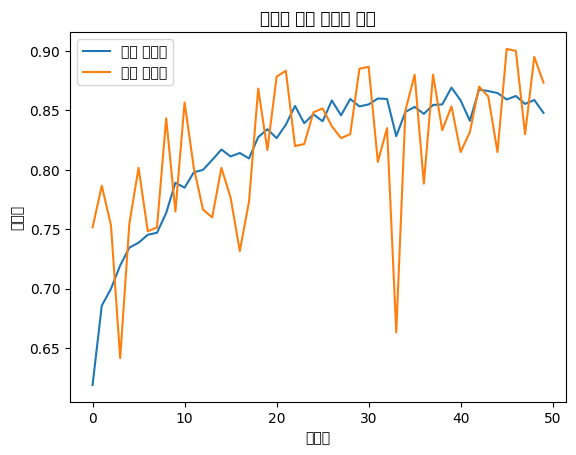

In [5]:
# 6. 학습 과정 시각화
plt.plot(history1.history['accuracy'], label='훈련 정확도')
plt.plot(history1.history['val_accuracy'], label='검증 정확도')
plt.title('고혈압 모델 정확도 추이')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.show()

In [6]:
# 1. 데이터 불러오기 및 전처리
df2 = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')
df2 = df2.dropna()  # 결측치 제거
df2 = df2.drop(['id'], axis=1)  # ID 컬럼 제거

# 성별: 남성 1, 여성 0
df2['gender'] = df2['gender'].apply(lambda x: 1 if x == '남성' else 0)

# 특성 선택 (중요하다고 분석된 변수들)
X2 = df2[['heart_disease', 'hypertension', 'age', 'bmi']]
y2 = df2['stroke']  # 타겟: 뇌졸중 여부

# 훈련/테스트 데이터 분할
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [7]:
# 2. 딥러닝 모델 구성
model2 = Sequential()

# 입력층 + 은닉층
model2.add(Dense(32, input_dim=4, activation='relu'))
model2.add(Dense(16, activation='relu'))

# 출력층
model2.add(Dense(1, activation='sigmoid'))

# 컴파일
model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

d:\machine-running\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 3. 모델 학습
history2 = model2.fit(
    X2_train, y2_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

In [9]:
# 4. 예측 및 평가
y2_pred_prob = model2.predict(X2_test)
y2_pred = (y2_pred_prob > 0.5).astype(int)

print("뇌졸중 예측 정확도:", accuracy_score(y2_test, y2_pred))
print("분류 보고서:\n", classification_report(y2_test, y2_pred))
print("혼동 행렬:\n", confusion_matrix(y2_test, y2_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
뇌졸중 예측 정확도: 0.9460285132382892
분류 보고서:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

혼동 행렬:
 [[929   0]
 [ 53   0]]


d:\machine-running\.venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\machine-running\.venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\machine-running\.venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45516 (\N{HANGUL SYLLABLE NOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\machine-running\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

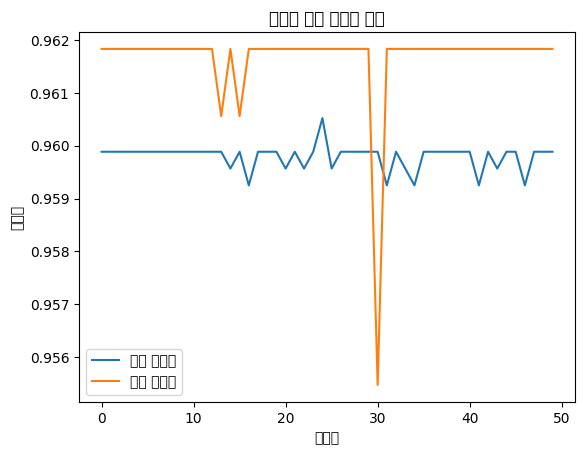

In [10]:
# 5. 학습 과정 시각화
plt.plot(history2.history['accuracy'], label='훈련 정확도')
plt.plot(history2.history['val_accuracy'], label='검증 정확도')
plt.title('뇌졸중 모델 정확도 추이')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.show()

In [11]:
model1.save('hypertension_dl_model.h5')  # 고혈압 모델 저장
model2.save('stroke_dl_model.h5')        # 뇌졸중 모델 저장